In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

import csv # lib for reading csvs
import pandas as pd #for processing data into a DataFrame.
import matplotlib.pyplot as plt #for plotting.

#dont care about these for now.
import numpy as np #for numerical processing.
from sklearn.linear_model import LogisticRegression #a type of classification model.
from sklearn.model_selection import train_test_split #function useful to split data into (train|test) splits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler #scaling values.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Load the data
solar_data = pd.read_csv("./solar_weather_data.csv")

#drop the first 3 columns
solar_data = solar_data.drop(solar_data.columns[0], axis=1)
solar_data = solar_data.drop(solar_data.columns[0], axis=1)
solar_data = solar_data.drop(solar_data.columns[0], axis=1)

#print(type(solar_data))
print(solar_data.head(20))
print("\n")

             time  cloudcover   dew  humidity  precip  precipprob  \
0   1643594400000        28.1  46.6     71.63     0.0           0   
1   1643598000000        15.8  45.7     76.61     0.0           0   
2   1643601600000         8.7  47.8     85.89     0.0           0   
3   1643605200000         8.7  45.9     87.05     0.0           0   
4   1643608800000        15.8  46.6     90.75     0.0           0   
5   1643612400000        16.5  44.7     85.73     0.0           0   
6   1643616000000         8.7  44.7     91.88     0.0           0   
7   1643619600000         9.4  42.9     90.72     0.0           0   
8   1643623200000        62.6  42.4     90.86     0.0           0   
9   1643626800000        26.2  40.7     89.44     0.0           0   
10  1643630400000        18.5  40.4     90.51     0.0           0   
11  1643634000000        32.5  39.0     86.51     0.0           0   
12  1643637600000        47.6  39.5     90.04     0.0           0   
13  1643641200000        57.5  39.

In [4]:
## Remove rows which where affected by database outages
# Remove rows with 0 whProduced and sunelevation > -1, the sun cant be up and not producing power
solar_data = solar_data.drop(solar_data[(solar_data['sunelevation'] > -1) & (solar_data['whProduced'] < 5)].index)
# Remove rows with whProduced > 5000, these are likely outliers
solar_data = solar_data.drop(solar_data[solar_data['whProduced'] > 5000].index)

In [6]:
# Convert time collumn from epoch ms to hour in day (ie 16 or 5) with time zone pacific
solar_data['time'] = pd.to_datetime(solar_data['time'], unit='ms')
solar_data['time'] = solar_data['time'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
solar_data['time'] = solar_data['time'].dt.hour

In [7]:
# print first 20 rows
print(solar_data.head(20))

    time  cloudcover   dew  humidity  precip  precipprob  solarenergy  \
0     18        28.1  46.6     71.63     0.0           0          0.2   
1     19        15.8  45.7     76.61     0.0           0          0.1   
2     20         8.7  47.8     85.89     0.0           0          0.1   
3     21         8.7  45.9     87.05     0.0           0          0.1   
4     22        15.8  46.6     90.75     0.0           0          0.1   
5     23        16.5  44.7     85.73     0.0           0          0.1   
6      0         8.7  44.7     91.88     0.0           0          0.1   
7      1         9.4  42.9     90.72     0.0           0          0.1   
8      2        62.6  42.4     90.86     0.0           0          0.1   
9      3        26.2  40.7     89.44     0.0           0          0.1   
10     4        18.5  40.4     90.51     0.0           0          0.1   
11     5        32.5  39.0     86.51     0.0           0          0.1   
12     6        47.6  39.5     90.04     0.0       

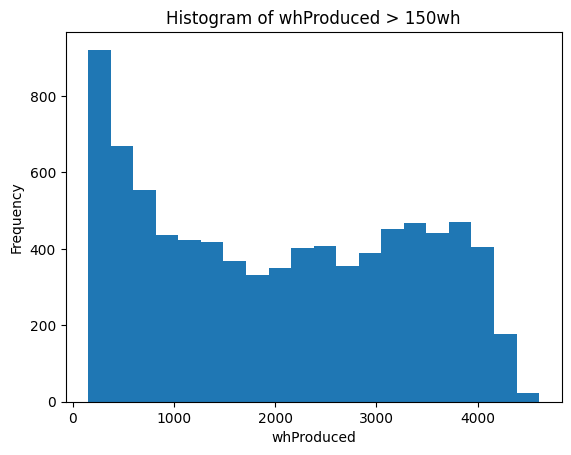

In [5]:
filtered_data = solar_data[solar_data['whProduced'] > 150]
plt.hist(filtered_data['whProduced'], bins=20)
plt.xlabel('whProduced')
plt.ylabel('Frequency')
plt.title('Histogram of whProduced > 150wh')
plt.show()

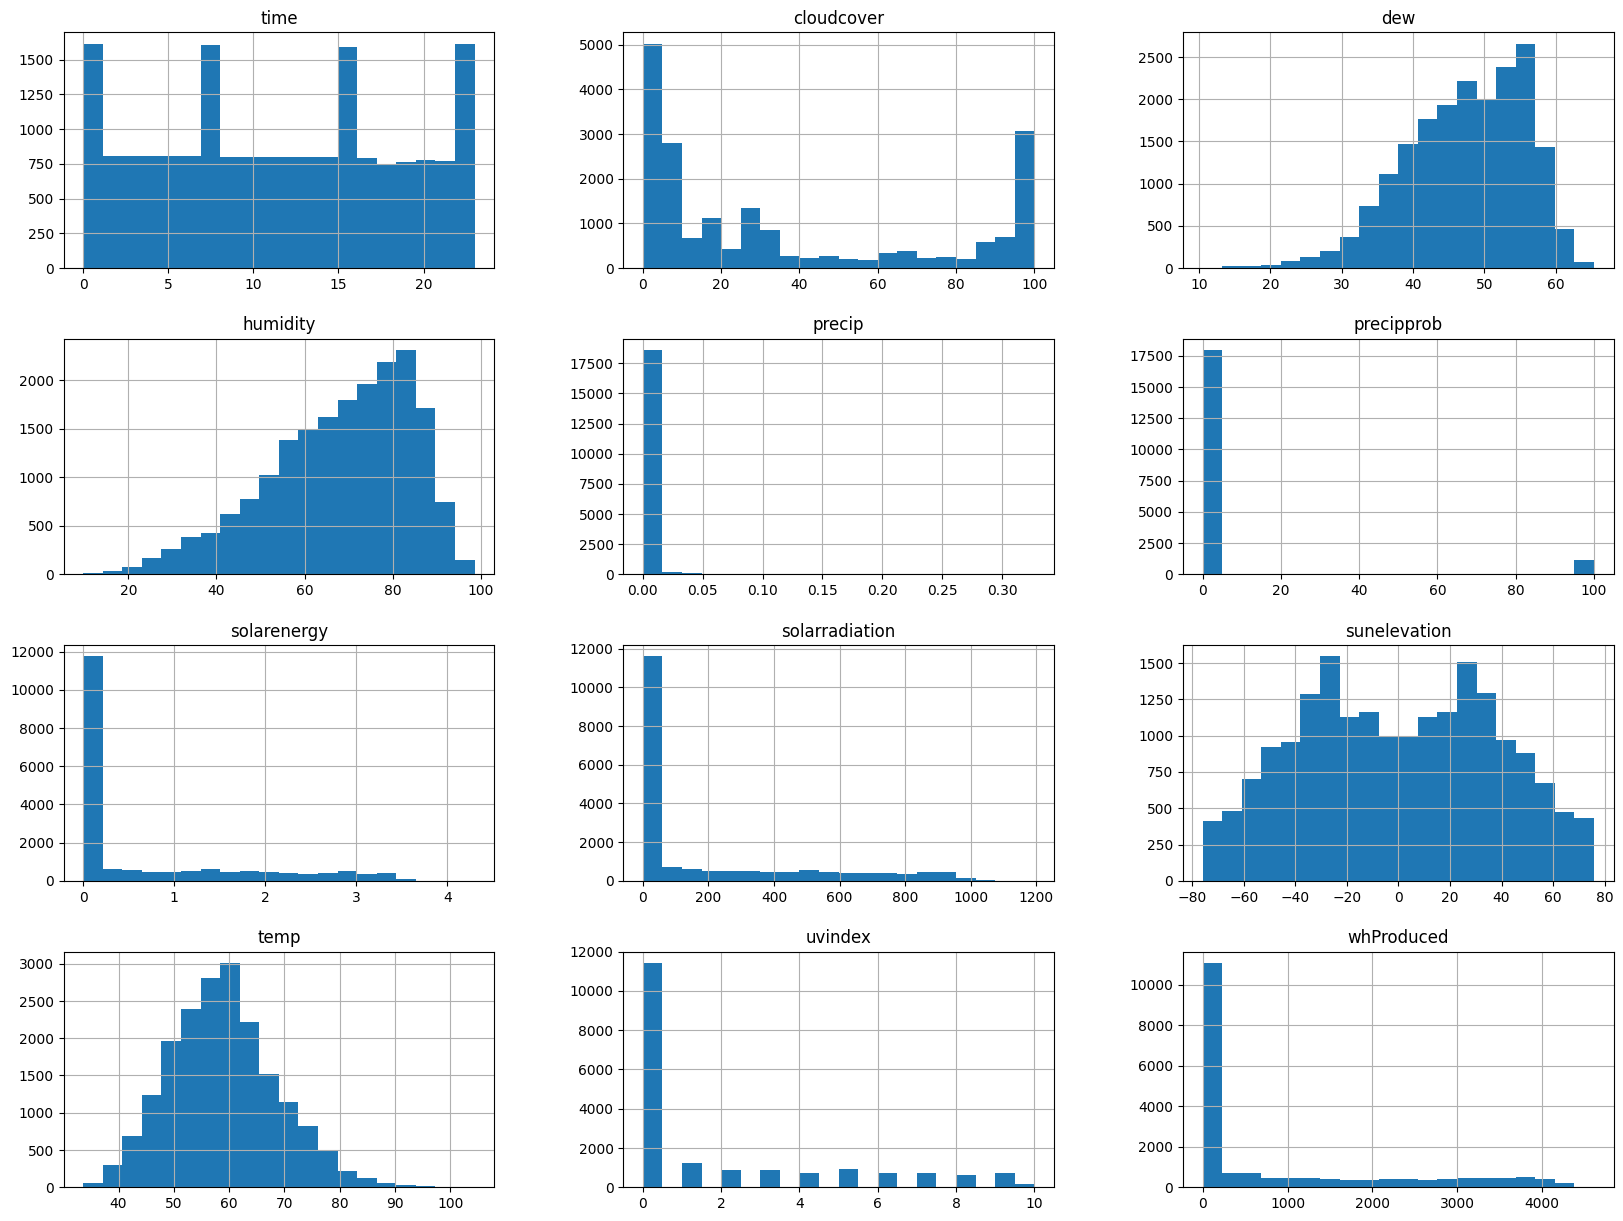

In [16]:
# Plot histograms for each of the features
solar_data.hist(bins=20, figsize=(20,15))
plt.show()

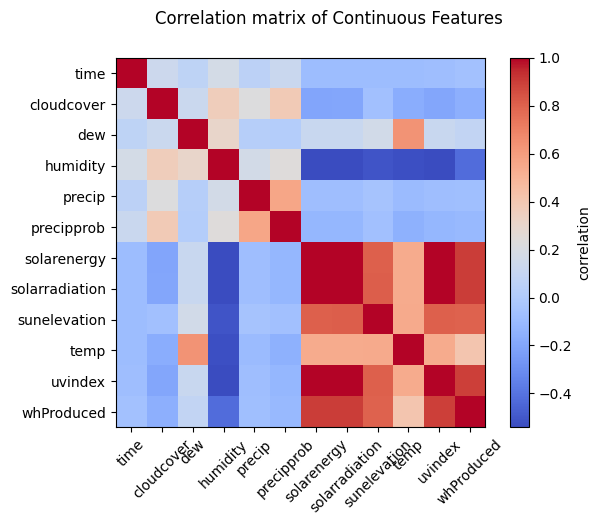

In [ ]:
corrmat = solar_data.corr()
plt.imshow(corrmat, cmap='coolwarm')
plt.colorbar(label = "correlation")
plt.xticks(range(len(corrmat)), corrmat.columns, rotation=45)
plt.yticks(range(len(corrmat)), corrmat.columns)
plt.suptitle("Correlation matrix of Continuous Features")
plt.show()

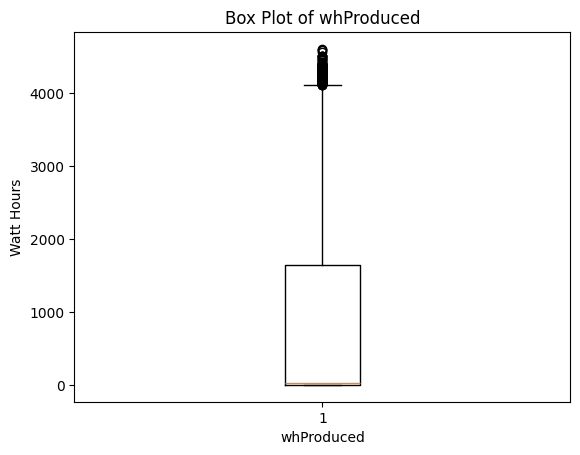

In [ ]:
plt.boxplot(solar_data['whProduced'])
plt.xlabel('whProduced')
plt.ylabel('Watt Hours')
plt.title('Box Plot of whProduced')
plt.show()


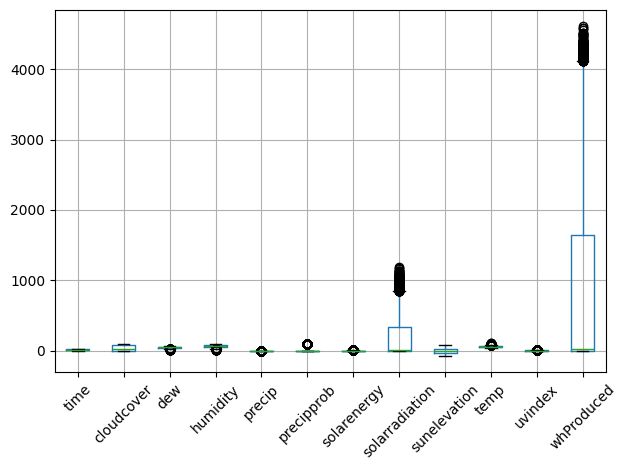

In [ ]:
solar_data.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Why are the box plots so wild?!?